# K-NEAREST NEIGHBOURS

Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?



In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset 

df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:

#checking the describtive statistic measurements

df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
#from the above observation we can conclude that {min=0 and max=1} so we can
#conclude that they are in binary format other than type column

#checking the infromation about the dataset whether there are any null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#from above observation we can conclude that there are no null values 

#checking how may values are associated with each number

df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
#filtering the data based on the categories

df_filtered=df[df['type']==1]

select_column=df_filtered[['type','animal name']]

select_column   #from the below results we can says they are mammals

,type,animal name
0,1,aardvark
1,1,antelope
3,1,bear
4,1,boar
5,1,buffalo
6,1,calf
9,1,cavy
10,1,cheetah
17,1,deer
19,1,dolphin


In [7]:
#filtering based on the types and make them into specific group

df_filtered=df[df['type']==2]

select_column=df_filtered[['type','animal name']]

select_column   # from the below results we an conclude that they are{birds}

,type,animal name
11,2,chicken
16,2,crow
20,2,dove
21,2,duck
23,2,flamingo
33,2,gull
37,2,hawk
41,2,kiwi
43,2,lark
56,2,ostrich


In [8]:
#filtering based on the types and make them into specific group

df_filtered=df[df['type']==3]

select_column=df_filtered[['type','animal name']]

select_column    #from the results we can conclude{Reptile}

,type,animal name
62,3,pitviper
76,3,seasnake
80,3,slowworm
90,3,tortoise
91,3,tuatara


In [9]:
#filtering based on the types and make them into specific group

df_filtered=df[df['type']==4]

select_column=df_filtered[['type','animal name']]

select_column  #from this below results we can conclude{fish categories}

,type,animal name
2,4,bass
7,4,carp
8,4,catfish
12,4,chub
18,4,dogfish
34,4,haddock
38,4,herring
60,4,pike
61,4,piranha
73,4,seahorse


In [10]:
#filtering based on the types and make them into specific group

df_filtered=df[df['type']==5]

select_column=df_filtered[['type','animal name']]

select_column

,type,animal name
25,5,frog
26,5,frog
52,5,newt
89,5,toad


In [11]:
df_filtered=df[df['type']==6]

select_column=df_filtered[['type','animal name']]

select_column    #we can conclude that they are {amphibian category}

,type,animal name
24,6,flea
30,6,gnat
39,6,honeybee
40,6,housefly
42,6,ladybird
51,6,moth
88,6,termite
97,6,wasp


In [12]:
#filtering based on the types and make them into specific group

df_filtered=df[df['type']==7]

select_column=df_filtered[['type','animal name']]

select_column     # we can conclude that they are {invertebrate category}

,type,animal name
13,7,clam
14,7,crab
15,7,crayfish
46,7,lobster
53,7,octopus
72,7,scorpion
77,7,seawasp
81,7,slug
85,7,starfish
99,7,worm


In [13]:
df.columns  #checking the columns names

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [14]:
df['aquatic'].value_counts(),df['backbone'].value_counts()

(0    65
 1    36
 Name: aquatic, dtype: int64,
 1    83
 0    18
 Name: backbone, dtype: int64)

# 1. Analyse the data using the visualizations

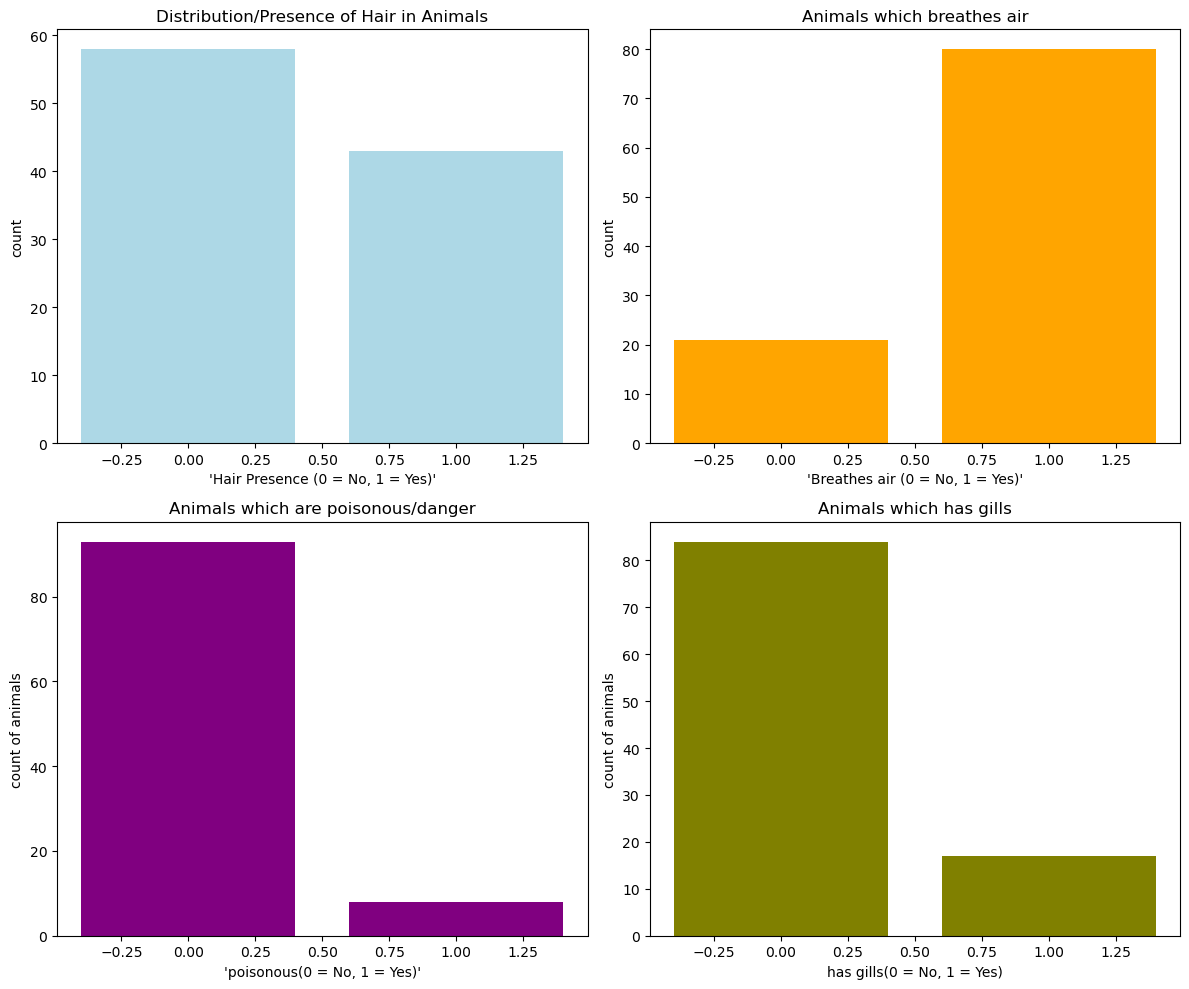

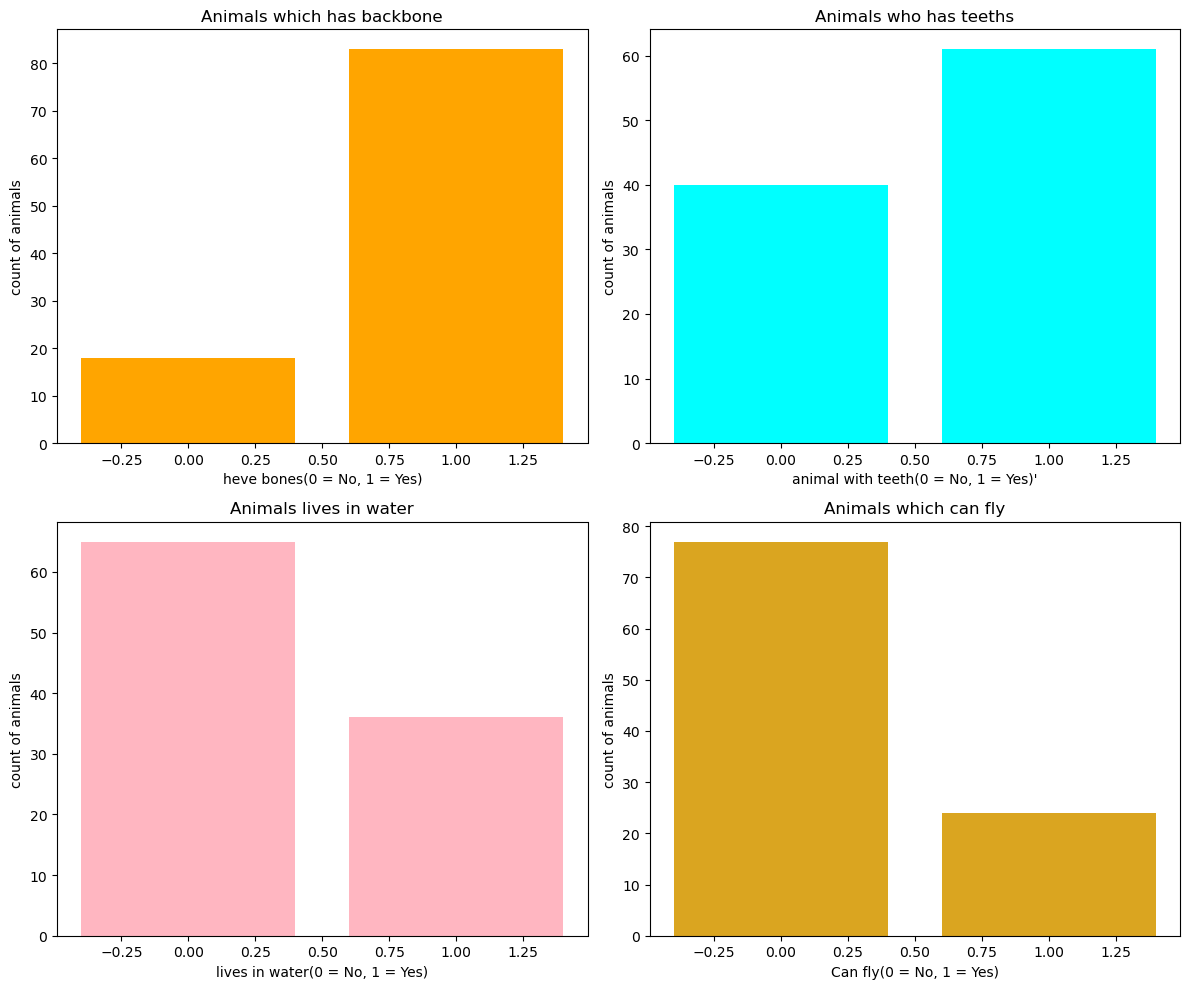

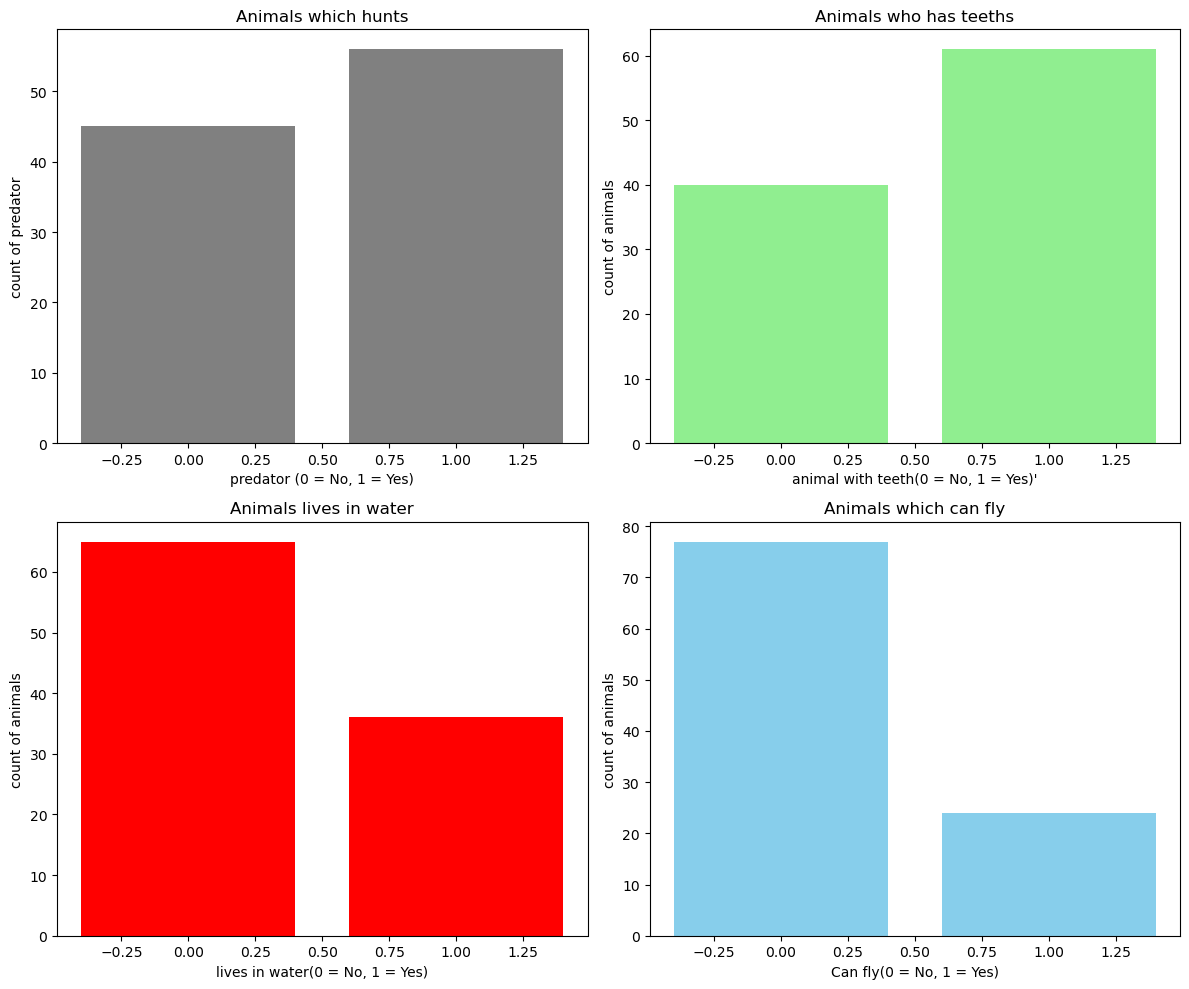

In [15]:
#creating a dashboard which contains all the bar chats 

fig,axes=plt.subplots(2,2,figsize=(12,10))

#creating a barplot for hair column
haircount=df['hair'].value_counts()

axes[0,0].bar(x=haircount.index,height=haircount.values,color='lightblue')
axes[0,0].set_title("Distribution/Presence of Hair in Animals")
axes[0,0].set_xlabel("'Hair Presence (0 = No, 1 = Yes)'")
axes[0,0].set_ylabel("count")



#creating a barplot for breathes columns

breathes=df['breathes'].value_counts()

axes[0,1].bar(x=breathes.index,height=breathes.values,color="orange")
axes[0,1].set_title("Animals which breathes air")
axes[0,1].set_xlabel("'Breathes air (0 = No, 1 = Yes)'")
axes[0,1].set_ylabel("count")




#creating a barplot for venomous columns

venomous=df['venomous'].value_counts()

axes[1,0].bar(x=venomous.index,height=venomous.values,color="purple")
axes[1,0].set_title("Animals which are poisonous/danger")
axes[1,0].set_xlabel("'poisonous(0 = No, 1 = Yes)'")
axes[1,0].set_ylabel("count of animals")




#creating a barplot for fins columns

fins=df['fins'].value_counts()

axes[1,1].bar(x=fins.index,height=fins.values,color="olive")
axes[1,1].set_title("Animals which has gills")
axes[1,1].set_xlabel("has gills(0 = No, 1 = Yes)")
axes[1,1].set_ylabel("count of animals")


plt.tight_layout()
plt.show()
print()
#====================================================================================-

fig,axes=plt.subplots(2,2,figsize=(12,10))

#creating a barplot for airborne columns

backbone=df['backbone'].value_counts()

axes[0,0].bar(x=backbone.index,height=backbone.values,color="orange")
axes[0,0].set_title("Animals which has backbone")
axes[0,0].set_xlabel("heve bones(0 = No, 1 = Yes)")
axes[0,0].set_ylabel("count of animals")


#creating a barplot for toothed columns

toothed=df['toothed'].value_counts()

axes[0,1].bar(x=toothed.index,height=toothed.values,color="cyan")
axes[0,1].set_title("Animals who has teeths")
axes[0,1].set_xlabel("animal with teeth(0 = No, 1 = Yes)'")
axes[0,1].set_ylabel("count of animals")

#creating a barplot for aquatic columns

aquatic=df['aquatic'].value_counts()

axes[1,0].bar(x=aquatic.index,height=aquatic.values,color="lightpink")
axes[1,0].set_title("Animals lives in water")
axes[1,0].set_xlabel("lives in water(0 = No, 1 = Yes)")
axes[1,0].set_ylabel("count of animals")

#creating a barplot for airborne columns

airborne=df['airborne'].value_counts()

axes[1,1].bar(x=airborne.index,height=airborne.values,color="goldenrod")
axes[1,1].set_title("Animals which can fly")
axes[1,1].set_xlabel("Can fly(0 = No, 1 = Yes)")
axes[1,1].set_ylabel("count of animals")

plt.tight_layout()
plt.show()
print()

#====================================================================================

fig,axes=plt.subplots(2,2,figsize=(12,10))

#creating a barplot for eggs columns

predators=df['predator'].value_counts()

axes[0,0].bar(x=predators.index,height=predators.values,color="grey")
axes[0,0].set_title("Animals which hunts")
axes[0,0].set_xlabel("predator (0 = No, 1 = Yes)")
axes[0,0].set_ylabel("count of predator")


#creating a barplot for toothed columns

toothed=df['toothed'].value_counts()

axes[0,1].bar(x=toothed.index,height=toothed.values,color="lightgreen")
axes[0,1].set_title("Animals who has teeths")
axes[0,1].set_xlabel("animal with teeth(0 = No, 1 = Yes)'")
axes[0,1].set_ylabel("count of animals")

#creating a barplot for aquatic columns

aquatic=df['aquatic'].value_counts()

axes[1,0].bar(x=aquatic.index,height=aquatic.values,color="red")
axes[1,0].set_title("Animals lives in water")
axes[1,0].set_xlabel("lives in water(0 = No, 1 = Yes)")
axes[1,0].set_ylabel("count of animals")

#creating a barplot for airborne columns

airborne=df['airborne'].value_counts()

axes[1,1].bar(x=airborne.index,height=airborne.values,color="skyblue")
axes[1,1].set_title("Animals which can fly")
axes[1,1].set_xlabel("Can fly(0 = No, 1 = Yes)")
axes[1,1].set_ylabel("count of animals")

plt.tight_layout()
plt.show()

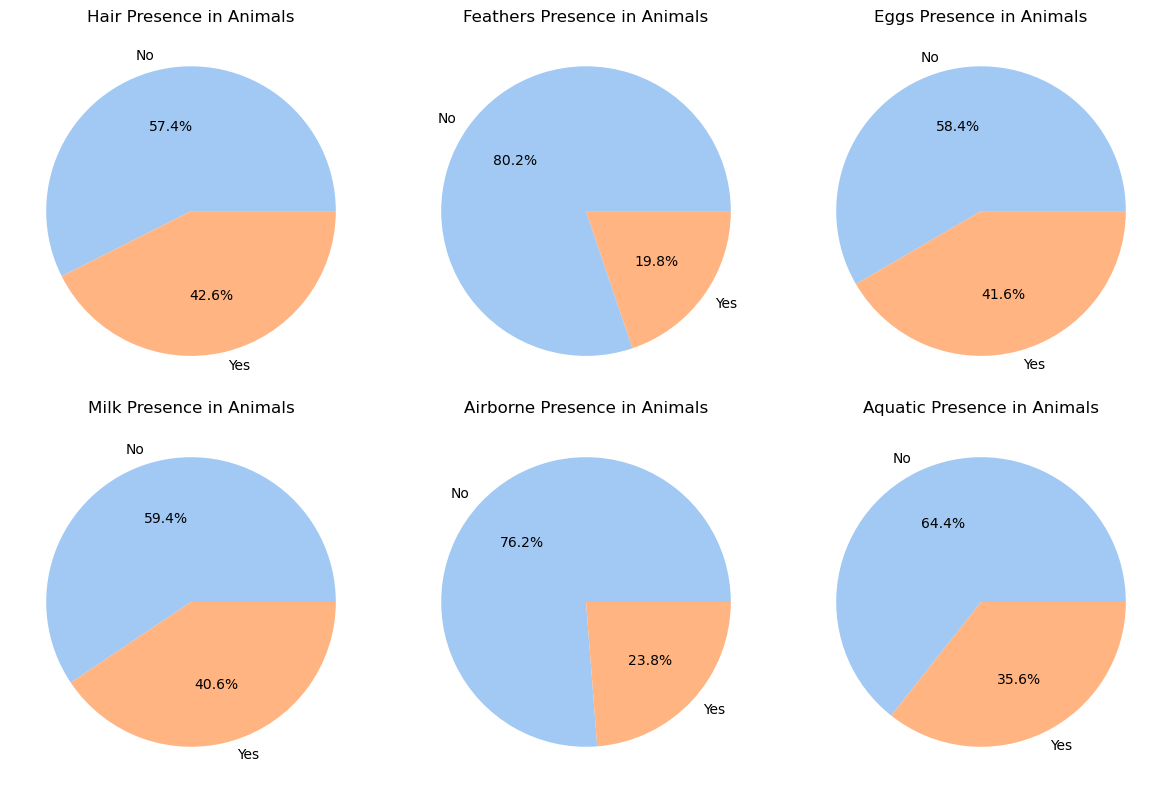

In [16]:
#creating pie charts to visuallly represent the categorical dta

import seaborn as sns

# Define attributes for pie charts
attributes =df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']]

# Create a dashboard using subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns for 6 pie charts

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)  # Convert index into row, column position
    data = df[attribute].value_counts()

    axes[row, col].pie(data, labels=["No", "Yes"], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    axes[row, col].set_title(f"{attribute.capitalize()} Presence in Animals")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

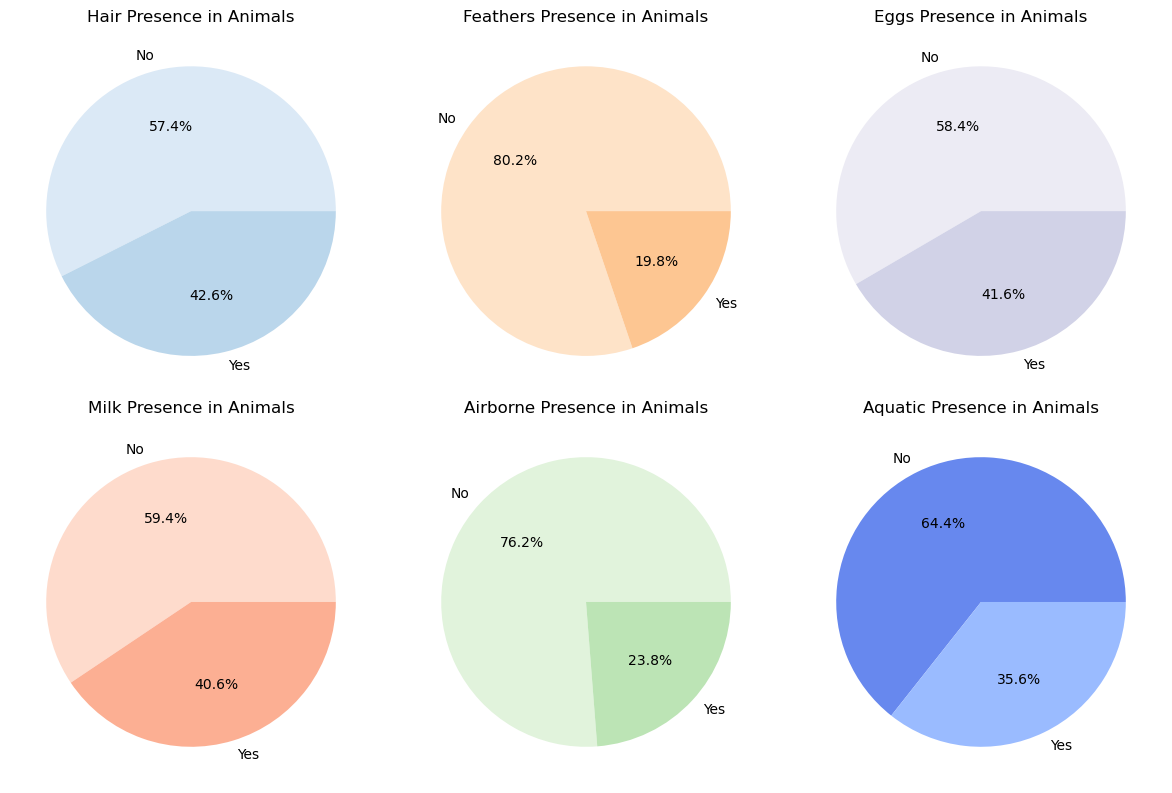

In [17]:
#creating same pie charts with different colors

# Define attributes for pie charts
attributes = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']

# Define unique color palettes for each plot
color_palettes = [
    sns.color_palette("Blues"),       # Hair
    sns.color_palette("Oranges"),     # Feathers
    sns.color_palette("Purples"),     # Eggs
    sns.color_palette("Reds"),        # Milk
    sns.color_palette("Greens"),      # Airborne
    sns.color_palette("coolwarm")     # Aquatic
]

# Create a dashboard using subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns for 6 pie charts

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)  # Convert index into row, column position
    data = df[attribute].value_counts()

    # Apply different color palettes for each attribute
    axes[row, col].pie(data, labels=["No", "Yes"], autopct='%1.1f%%', colors=color_palettes[i])
    axes[row, col].set_title(f"{attribute.capitalize()} Presence in Animals")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [18]:

pip install squarify

Note: you may need to restart the kernel to use updated packages.


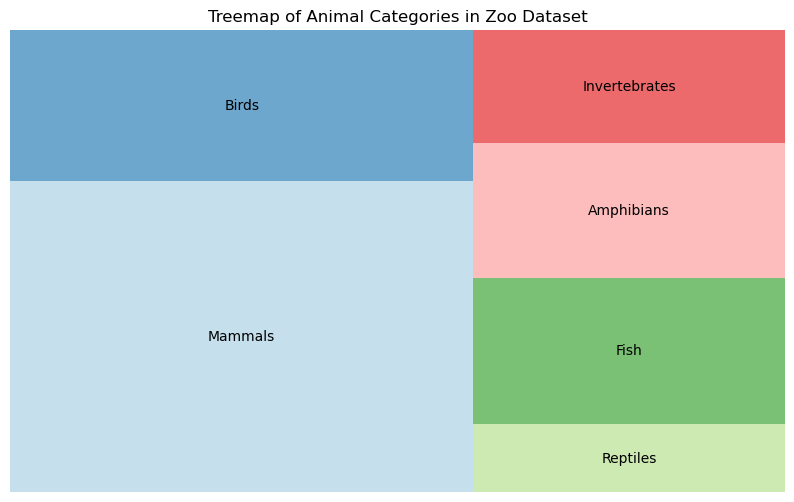

In [19]:
#creating a tree  map

import squarify
import matplotlib.pyplot as plt

# names and counts of animals
labels = ['Mammals', 'Birds', 'Reptiles', 'Fish', 'Amphibians', 'Invertebrates']
sizes = [41, 20, 6, 13, 12, 10]  # Sample counts

# Treemap
plt.figure(figsize=(10, 6))           #aplha describes the color thickness
squarify.plot(sizes=sizes, label=labels, alpha=0.65, color=plt.cm.Paired.colors)

plt.title("Treemap of Animal Categories in Zoo Dataset")
plt.axis('off')  # Hide axes
plt.show()

In [20]:
#pip install squarify

# 2. Preprocess the data by handling missing values & Outliers, if any.

In [21]:
#from these function we can find the datatypes and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [22]:
#from these code we can find the values associated with each column

print(df['hair'].value_counts())
print(df['feathers'].value_counts())
print(df['eggs'].value_counts())
print(df['milk'].value_counts())
print(df['airborne'].value_counts())
print(df['aquatic'].value_counts())
print(df['predator'].value_counts())
print(df['toothed'].value_counts())
print(df['backbone'].value_counts())
print(df['venomous'].value_counts())
print(df['fins'].value_counts())
print(df['legs'].value_counts())
print(df['tail'].value_counts())
print(df['domestic'].value_counts())
print(df['catsize'].value_counts())

0    58
1    43
Name: hair, dtype: int64
0    81
1    20
Name: feathers, dtype: int64
1    59
0    42
Name: eggs, dtype: int64
0    60
1    41
Name: milk, dtype: int64
0    77
1    24
Name: airborne, dtype: int64
0    65
1    36
Name: aquatic, dtype: int64
1    56
0    45
Name: predator, dtype: int64
1    61
0    40
Name: toothed, dtype: int64
1    83
0    18
Name: backbone, dtype: int64
0    93
1     8
Name: venomous, dtype: int64
0    84
1    17
Name: fins, dtype: int64
4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
1    75
0    26
Name: tail, dtype: int64
0    88
1    13
Name: domestic, dtype: int64
0    57
1    44
Name: catsize, dtype: int64


In [23]:
#from the above information we can find all the values are binary and other than fins
#the fins columns is like label encoded

In [24]:
#we can't find the outlayers because the values are like label encoded
#if we find outlayer for this column we will find atleast one value as oulayer
#the oulayers can be  find only for continuous data

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [25]:
from sklearn.model_selection import train_test_split


x=df.iloc[:,1:]  #independent variable
y=df.loc[:,'animal name'] #dependent variable

In [26]:
df.shape

(101, 18)

In [27]:
#standardization the data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)
x=pd.DataFrame(x,columns=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'])
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,-0.875451
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,1.514294
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,1.992242


In [28]:
#label encodeing the animal names column

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

y=label.fit_transform(y)
y=pd.DataFrame(y,columns=['animal name'])
y

,animal name
0,0
1,1
2,2
3,3
4,4
...,...
96,95
97,96
98,97
99,98


In [29]:
#spliting the data into train and test/data partation

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=37)

In [30]:
#checking the shape of partation data

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((80, 17), (21, 17), (80, 1), (21, 1))

# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [31]:
#importing the K neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)     #initializing the the k neighbours 

knn.fit(xtrain,ytrain)                      #fitting the model

y_train_pred=knn.predict(xtrain)
y_test_pred=knn.predict(xtest)

In [32]:
#calculating thye metrics like accuracy_score and precision score

from sklearn.metrics import accuracy_score,precision_score

train_accuracy=accuracy_score(ytrain,y_train_pred)
print("train_accuarcy score:",train_accuracy)

test_accuracy=accuracy_score(ytest,y_test_pred)
print("train_accuarcy score:",test_accuracy)


train_accuarcy score: 0.2125
train_accuarcy score: 0.0


In [33]:
#implementing the cross validation technique with the help of for loop

import warnings
warnings.filterwarnings("ignore")

training_acc=[]   #creating a empty list which stores the result of train 
testing_acc=[]    #creating a empty list which stores the result of train 

for i in range(101,201,1):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=i)
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(xtrain,ytrain)
    y_pred_train=model.predict(xtrain)
    y_pred_test=model.predict(xtest)
    training_acc.append(accuracy_score(ytrain,y_pred_train))
    testing_acc.append(accuracy_score(ytest,y_pred_test))
    
print("cross validation: training accuracy:" , np.round(np.mean(training_acc),2))
print("cross validation: test accuracy:" , np.round(np.mean(testing_acc),2))


cross validation: training accuracy: 0.19
cross validation: test accuracy: 0.01


In [34]:
#from the above results we can conclude that dependent variables animal_name
#is not a best target variable because it contains unique values in each row
#So the model is not able to conclude the results based on the independent 
#variables so we are getting the "0" accuracy.Lets check with other dependent
#variable "Type" as target variable

# Model 2

In [35]:
x1=df.iloc[:,1:17]  #independent variable
y1=df.loc[:,'type'] #dependent variable

In [36]:
y1

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [37]:
#spliting the data into train and test/data partation

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.20,random_state=37)

In [38]:
#checking the shape of partation data

xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape

((80, 16), (21, 16), (80,), (21,))

In [39]:
#importing the K neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)   #initializing the number of k neighbours

knn.fit(xtrain1,ytrain1)

y_train_pred=knn.predict(xtrain1)
y_test_pred=knn.predict(xtest1)

In [40]:
#calculating thye metrics like accuracy_score and precision score

from sklearn.metrics import accuracy_score,precision_score

train_accuracy=accuracy_score(ytrain1,y_train_pred)
print("train_accuarcy score:",train_accuracy)

test_accuracy=accuracy_score(ytest1,y_test_pred)
print("test_accuarcy score:",test_accuracy)




train_accuarcy score: 0.95
test_accuarcy score: 0.9523809523809523


In [41]:
#apply the cross validation techniques like kfold validation using the library for hole dataset

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,ShuffleSplit

#applying Kflod cross validation

model1=KNeighborsClassifier(n_neighbors=5)

KFold=KFold(n_splits=5,random_state=37,shuffle=True)

results=cross_val_score(model1,x1,y1,cv=KFold)

print("cross validation results of Kfold     :",results.mean())
print()

#no need of applying many cross validation techniques i am apply this for my satisfaction and comparing the results using 
#different techniques

#===========================================================================

#apply shuffle split cross validation 

shuffle=ShuffleSplit(n_splits=5,test_size=0.20,random_state=37)

result=cross_val_score(model1,x1,y1,cv=shuffle)

print("Shuffle split cross validation results:",result.mean())
print()

#apply shuffle split cross validation 

shuffle=ShuffleSplit(n_splits=5,test_size=0.20,random_state=37)

resulttest=cross_val_score(model1,x1,y1,cv=shuffle)

print("Shuffle split cross validation results:",resulttest.mean())

cross validation results of Kfold     : 0.8404761904761905

Shuffle split cross validation results: 0.8857142857142858

Shuffle split cross validation results: 0.8857142857142858


# 5. Choose an appropriate distance metric and value for K.

In [42]:
#Grid search CV
#searches all possible hyperparameter combinations work best for small datasets 


from sklearn.model_selection import GridSearchCV


#defining the param_grids

param_grid={'n_neighbors':np.arange(3,20,2),   #no of neighbours to be consider
            'weights':['uniform','distance'],  #how neighbour influence classification (uniform=equal importance,distance=heigher importance to closer points)
           'metric':['euclidean','manhattan']}   #the distance metrics or formula

#applying the grid serach cv

grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring='accuracy')

grid_search.fit(xtrain1,ytrain1)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [43]:
# finding the best parameters Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [44]:
#from the result we can conclude that the best distance formula is manhattan{ |x1 - x2| + |y1 - y2|} and the n_neighbour
#is "3" with higest accuracy score amd the weight is distance(it gives more priority to clozser points)

[0.9190476190476191]
[0.9190476190476191, 0.8571428571428571]
[0.9190476190476191, 0.8571428571428571, 0.8238095238095238]
[0.9190476190476191, 0.8571428571428571, 0.8238095238095238, 0.7904761904761906]
[0.9190476190476191, 0.8571428571428571, 0.8238095238095238, 0.7904761904761906, 0.7904761904761906]
[0.9190476190476191, 0.8571428571428571, 0.8238095238095238, 0.7904761904761906, 0.7904761904761906, 0.7857142857142857]


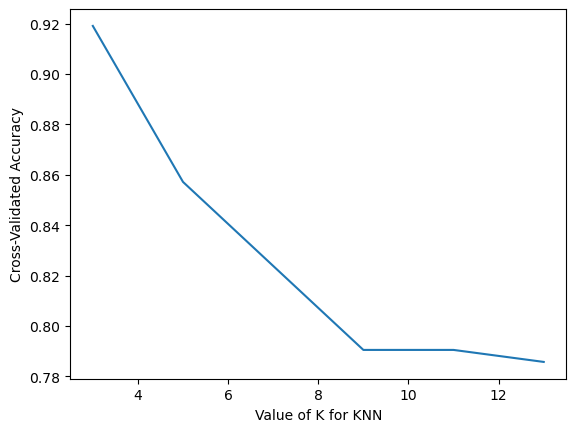

In [45]:
#finding the best k value even if the dataset is so large

k_range = range(3, 15,2) #we are staring from 3 because 1 has "high variance" and 2 has high variance and proability will be 50%
k_scores = []            # if we take higher values like 80 and 100 it takes more computational time

# use iteration to caclulator different k in models, 
#then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')  #choosing the distance formula as euclidian{sqrt.(x1-y1)^2}
    shuffle=ShuffleSplit(n_splits=10,test_size=0.20,random_state=37)
    scores = cross_val_score(knn, x1, y1, cv=shuffle)
    k_scores.append(scores.mean())
    print(k_scores)
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [46]:
#from the above observation we can say the n_neighbour="3" is giving the maximum resul

# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [47]:
y_train_pred=pd.DataFrame(y_train_pred,columns=['y_train_pred'])

y_test_pred=pd.DataFrame(y_test_pred,columns=['y_test_pred'])

In [48]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytrain1,y_train_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  1,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  9]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score

accuracy=accuracy_score(ytrain1,y_train_pred)
print("Accuracy score of training data:",accuracy)
accuracytest=accuracy_score(ytest1,y_test_pred)
print("Accuracy score of testing data :",accuracytest)
print()

precision=precision_score(ytrain1,y_train_pred,average='macro')   #if we have multiclass in target other than binary we have to use average parameter 
print("precision score of training data:",precision)
precisiontest=precision_score(ytest1,y_test_pred,average='macro')#macro computes precision for each class seperately and takes average
print("Precision score of testing data :",precisiontest)
print()

recall=recall_score(ytrain1,y_train_pred,average='macro')
print("Recall   score of training data:",recall)
recalltest=recall_score(ytest1,y_test_pred,average='macro')
print("Recall   score of testing data :",recalltest)
print()


f1score=f1_score(ytrain1,y_train_pred,average='macro')
print("f1  score of training data:",f1score)
f1scoretest=f1_score(ytest1,y_test_pred,average='macro')
print("f1  score of testing data :",f1scoretest)
print()


Accuracy score of training data: 0.95
Accuracy score of testing data : 0.9523809523809523

precision score of training data: 0.9166666666666667
Precision score of testing data : 0.8166666666666668

Recall   score of training data: 0.8785714285714287
Recall   score of testing data : 0.8333333333333334

f1  score of training data: 0.8603847280539011
f1  score of testing data : 0.8245614035087719



# 7. Visualize the decision boundaries of the classifier.


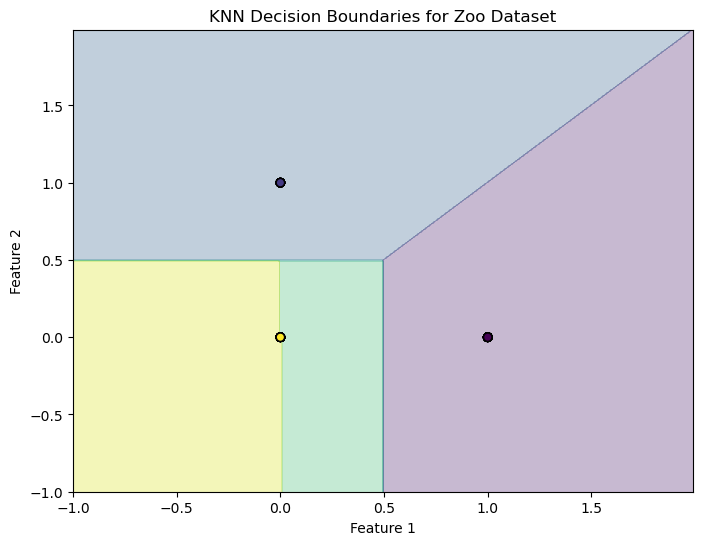

In [50]:
#visualizing the decision boundaries based on two columns

X = df[['hair', 'feathers']].values
y = df['type'] 

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundaries for Zoo Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

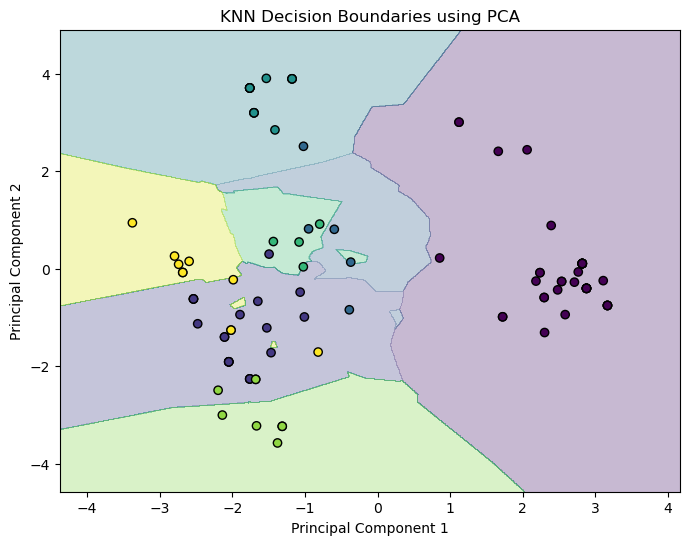

In [51]:
#visualizing the decision boundraies using pca principle component analysis 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Extract features and target variable
X = df.drop(columns=['animal name', 'type']).values  # Exclude non-numeric columns
y = df['type'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

# Create mesh grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundaries using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


In [52]:
#1.What are the key hyperparameters in KNN?

#Ans:-There are three hyperparametrs present in K-nearest neihbors classifie

#    1)n_neighbors:-the number of neighbors to consider for classification
#    ==>small number can be overfitted(1,2)and large numbers can be underfitting

#    2)distance metrics:choice of distance metrics effects how similarity between points is ,easued
#     =>euclidean distance,
#     =>manhattan distance

#    3)weights:-how neighbors influence the prediction
#      =>uniform:-all neighbors contributes equally
#      =>distance:-closer neighbors have higher influence

# may be there could be a chace of more hyperparameters but we were thought these


In [53]:
#2)What distance metrics can be used in KNN?

#Ans) we use the distance metrics as euclidean distance or manhattan distance for 
#      calculating the distance between points.we use euclidean more because it is mostly widely 
#      used distance metrics for knn classifier

